# D题第一问
## 背景描述
移动通信技术规模飞速发展，运营规模也越来越大，导致带来的通信网络越来越复杂。随着5G的发展，通信的带宽越来越大，但基站的能覆盖范围越来越小，使得覆盖同样的区域，需要的基站数量变得更多。另外，基站和天线的种类也变多了。这就使得通信网络的规划特别是站址选择的问题变得越来越复杂。

站址选择问题是：根据现网天线的覆盖情况，给出现网的弱覆盖区域，选择一定数量的点，使得在这些点上新建基站后，可以解决现网的弱覆盖区域的覆盖问题。例如，下图为某城市某区域的现网覆盖情况，其中红色的区域表示为弱覆盖区域。

在实际网络规划中，考虑基站的建设成本和一些其他因素，有时候可能无法把所有弱覆盖区域都解决，这时候就需要考虑业务量的因素，尽量优先解决业务量高的弱覆盖区域。

为了便于计算，将给定的区域用很小的栅格进行划分，只考虑每个栅格的中心点，即任给一个区域，都可以分成有限个点。每个点有一些属性值，包括：坐标、是否为弱覆盖点、业务量等。站址也只能选择区域内的点。某个点是否被规划基站覆盖可以按如下方法判断：

设选择基站的覆盖范围为 d，基站所规划的点的坐标为 (x0, y0)，则对于坐标为 (x, y) 的点，若 √((x - x0)^2 + (y - y0)^2) ≤ d，则认为该点被该基站覆盖，否则认为该点没有被该基站覆盖。

同时，实际中还需要考虑一个约束条件，即新建站址之间以及新建站址和现有站址之间的距离不能小于等于给定门限。

## 问题1
给定区域的大小是 2500×2500 个栅格即 2500×2500 个点，其中横坐标范围是 0 到 2499，纵坐标范围是 0 到 2499。附件1中是筛选出该区域中的弱覆盖点的信息，包括每个点的坐标和业务量。给定2种基站，分别为：

宏基站（覆盖范围30，成本10）
微基站（覆盖范围10，成本1）
附件2中还给出了现网基站的坐标点，新建站址之间以及新建站址和现有站址之间的距离的门限是10。

根据给定的信息和附件中的数据，进行站址规划，使得弱覆盖点总业务量的90%被规划基站覆盖。给出选择的站址的坐标以及每个站址选择的基站种类。站址的坐标只能在给定区域内的 2500×2500 个点中选择。

## 思路解析
可视化：
首先将当前的弱信号节点以及基站覆盖情况通过 plot 绘图展示

填入约束信息

使用算法评估

结果展示

## 算法选择

### 1. 贪心算法 + 集合覆盖思路（本次采用）
核心思想：每次选择能覆盖最多未覆盖业务量的站址
步骤：
- 计算每个候选站址（2500×2500个点）在两种基站类型下的覆盖业务量
- 考虑距离约束，筛选可行站址
- 贪心选择覆盖业务量/成本比最高的站址
- 更新未覆盖区域，重复直到达到90%覆盖率

**优点**：实现简单，计算效率高，能快速得到较好解
**缺点**：可能陷入局部最优，无法保证全局最优解

### 2. 整数规划模型
建立数学模型：
- 决策变量：x[i][j] 表示在位置i建设基站类型j
- 目标函数：最小化总成本
- 约束条件：覆盖率约束、距离约束、覆盖关系约束

**优点**：理论上能找到全局最优解
**缺点**：计算复杂度高，对于大规模问题求解困难

### 3. 启发式算法
包括遗传算法、模拟退火、粒子群优化等：
- 随机初始化基站配置
- 通过交叉、变异等操作迭代优化
- 避免陷入局部最优

**优点**：适合大规模优化问题，能跳出局部最优
**缺点**：参数调节复杂，收敛时间不确定

### 4. 分层求解策略
- 第一阶段：使用宏基站进行粗粒度覆盖
- 第二阶段：使用微基站补充覆盖空隙
- 第三阶段：局部优化调整

**优点**：符合实际工程思路，计算效率高
**缺点**：可能错过全局最优的混合配置

### 5. 聚类 + 中心选址
- 对弱覆盖点按业务量和位置进行聚类
- 在每个聚类中心附近选择最优站址
- 考虑不同基站类型的覆盖效果

**优点**：充分利用空间分布特征
**缺点**：聚类效果影响最终结果

本问题我们选择贪心算法作为主要求解方法，因为：
1. 问题规模较大（2500×2500个候选点）
2. 需要快速得到可行解
3. 贪心策略符合实际工程决策思路



## 代码部分

### 数据导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
weak_points = pd.read_csv('weak.csv')
current_stations = pd.read_csv('current.csv')

print(f"弱覆盖点数量: {len(weak_points)}")
print(f"现有基站数量: {len(current_stations)}")
print(f"总业务量: {weak_points['traffic'].sum():.2f}")
print(f"需要覆盖的业务量(90%): {weak_points['traffic'].sum() * 0.9:.2f}")

# 基站参数设置
MACRO_RANGE = 30  # 宏基站覆盖范围
MICRO_RANGE = 10  # 微基站覆盖范围
MACRO_COST = 10   # 宏基站成本
MICRO_COST = 1    # 微基站成本
MIN_DISTANCE = 10 # 最小距离约束
COVERAGE_TARGET = 0.9  # 覆盖目标(90%)

print("\n基站参数:")
print(f"宏基站: 覆盖范围={MACRO_RANGE}, 成本={MACRO_COST}")
print(f"微基站: 覆盖范围={MICRO_RANGE}, 成本={MICRO_COST}")
print(f"距离约束: {MIN_DISTANCE}")

弱覆盖点数量: 182807
现有基站数量: 1474
总业务量: 7056230.11
需要覆盖的业务量(90%): 6350607.10

基站参数:
宏基站: 覆盖范围=30, 成本=10
微基站: 覆盖范围=10, 成本=1
距离约束: 10


### 导入数据可视化

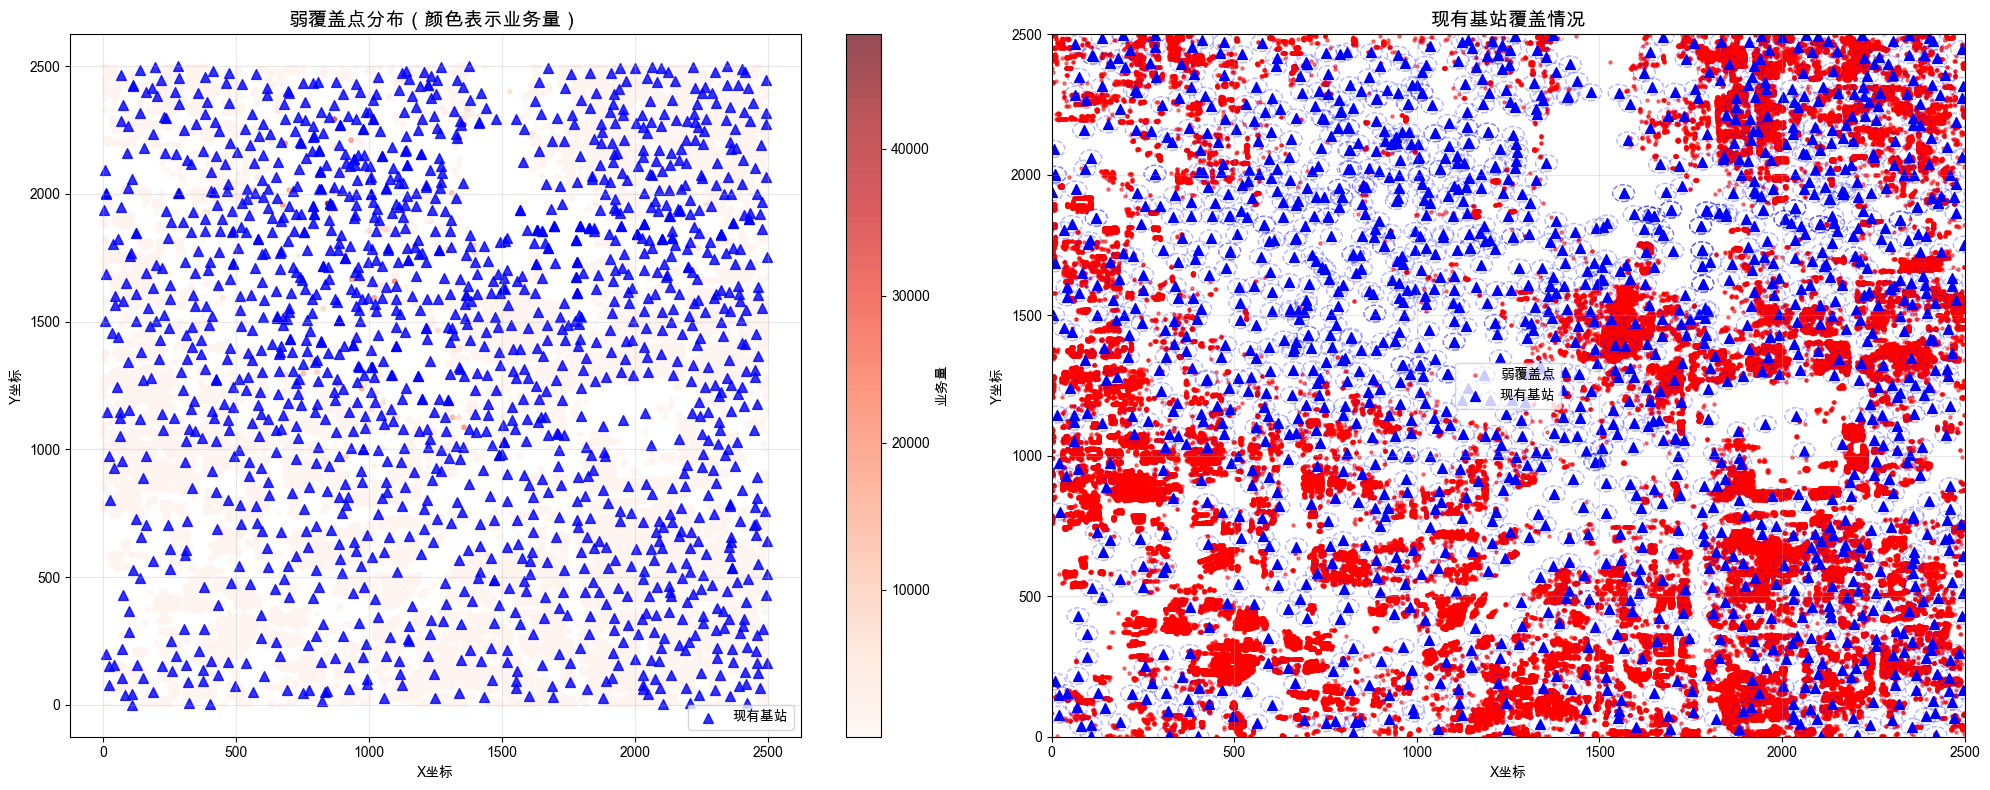


业务量统计:
最大业务量: 47795.01
最小业务量: 0.00
平均业务量: 38.60
业务量标准差: 336.38


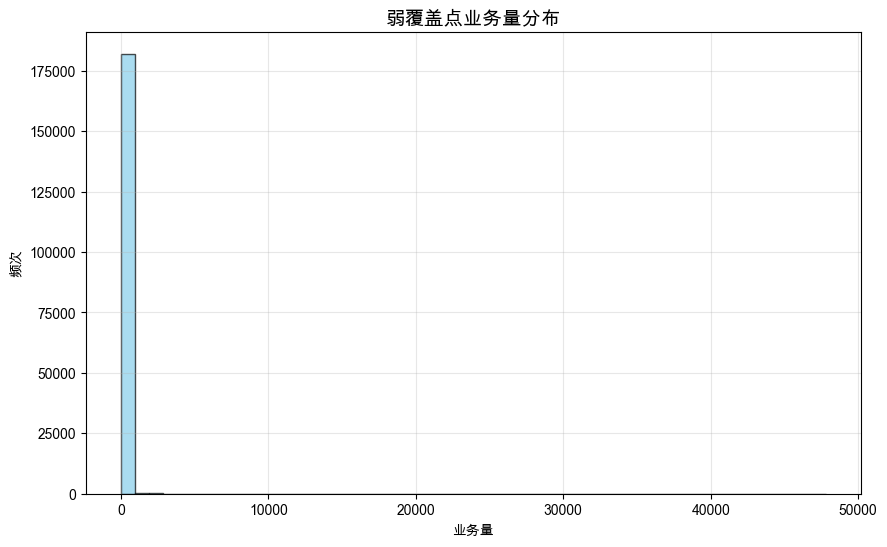

In [2]:
# 数据可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 子图1: 弱覆盖点分布（按业务量着色）
scatter = ax1.scatter(weak_points['x'], weak_points['y'], 
                     c=weak_points['traffic'], cmap='Reds', 
                     s=10, alpha=0.7)
ax1.scatter(current_stations['x'], current_stations['y'], 
           color='blue', s=50, marker='^', label='现有基站', alpha=0.8)
ax1.set_title('弱覆盖点分布（颜色表示业务量）', fontsize=14)
ax1.set_xlabel('X坐标')
ax1.set_ylabel('Y坐标')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='业务量')

# 子图2: 现有基站覆盖情况
ax2.scatter(weak_points['x'], weak_points['y'], 
           color='red', s=5, alpha=0.5, label='弱覆盖点')
ax2.scatter(current_stations['x'], current_stations['y'], 
           color='blue', s=50, marker='^', label='现有基站')

# 绘制现有基站的覆盖范围（假设覆盖范围为30）
for _, station in current_stations.iterrows():
    circle = Circle((station['x'], station['y']), 30, 
                   fill=False, color='blue', alpha=0.3, linestyle='--')
    ax2.add_patch(circle)

ax2.set_title('现有基站覆盖情况', fontsize=14)
ax2.set_xlabel('X坐标')
ax2.set_ylabel('Y坐标')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 2500)
ax2.set_ylim(0, 2500)

plt.tight_layout()
plt.show()

# 业务量统计
print(f"\n业务量统计:")
print(f"最大业务量: {weak_points['traffic'].max():.2f}")
print(f"最小业务量: {weak_points['traffic'].min():.2f}")
print(f"平均业务量: {weak_points['traffic'].mean():.2f}")
print(f"业务量标准差: {weak_points['traffic'].std():.2f}")

# 显示业务量分布直方图
plt.figure(figsize=(10, 6))
plt.hist(weak_points['traffic'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('弱覆盖点业务量分布', fontsize=14)
plt.xlabel('业务量')
plt.ylabel('频次')
plt.grid(True, alpha=0.3)
plt.show()

### 贪心算法

In [4]:
def calculate_distance(point1, point2):
    """计算两点间欧氏距离"""
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def get_covered_points(station_x, station_y, coverage_range, weak_points):
    """获取某个基站覆盖的弱覆盖点"""
    distances = np.sqrt((weak_points['x'] - station_x)**2 + (weak_points['y'] - station_y)**2)
    return weak_points[distances <= coverage_range]

def check_distance_constraint(new_x, new_y, existing_stations, min_distance):
    """检查距离约束是否满足"""
    for _, station in existing_stations.iterrows():
        if calculate_distance((new_x, new_y), (station['x'], station['y'])) < min_distance:
            return False
    return True

def greedy_station_placement():
    """贪心算法进行站址规划"""
    total_traffic = weak_points['traffic'].sum()
    target_traffic = total_traffic * COVERAGE_TARGET
    
    # 初始化
    selected_stations = []  # 存储选择的基站 (x, y, type, range, cost)
    covered_traffic = 0
    uncovered_points = weak_points.copy()
    uncovered_points['covered'] = False
    
    print(f"目标覆盖业务量: {target_traffic:.2f}")
    print("开始贪心算法...")
    
    iteration = 0
    while covered_traffic < target_traffic and len(uncovered_points[~uncovered_points['covered']]) > 0:
        iteration += 1
        best_score = -1
        best_station = None
        
        # 采样策略：在弱覆盖点集中区域采样候选点
        sample_size = min(5000, len(uncovered_points[~uncovered_points['covered']]))
        if sample_size > 0:
            sample_indices = np.random.choice(
                uncovered_points[~uncovered_points['covered']].index, 
                sample_size, replace=False
            )
            candidate_points = uncovered_points.loc[sample_indices, ['x', 'y']]
        else:
            break
            
        # 为每个候选点评估两种基站类型
        for idx, (_, point) in enumerate(candidate_points.iterrows()):
            if idx % 1000 == 0:
                print(f"第{iteration}轮，已评估{idx}/{len(candidate_points)}个候选点")
                
            x, y = point['x'], point['y']
            
            # 检查距离约束
            if selected_stations:
                # 从已选择的基站中提取坐标
                selected_coords = pd.DataFrame([(s[0], s[1]) for s in selected_stations], columns=['x', 'y'])
                all_stations = pd.concat([current_stations[['x', 'y']], selected_coords])
            else:
                all_stations = current_stations[['x', 'y']]
            
            if not check_distance_constraint(x, y, all_stations, MIN_DISTANCE):
                continue
            
            # 评估宏基站
            macro_covered = get_covered_points(x, y, MACRO_RANGE, uncovered_points[~uncovered_points['covered']])
            macro_traffic = macro_covered['traffic'].sum()
            macro_score = macro_traffic / MACRO_COST if macro_traffic > 0 else 0
            
            if macro_score > best_score:
                best_score = macro_score
                best_station = (x, y, 'macro', MACRO_RANGE, MACRO_COST, macro_traffic)
            
            # 评估微基站
            micro_covered = get_covered_points(x, y, MICRO_RANGE, uncovered_points[~uncovered_points['covered']])
            micro_traffic = micro_covered['traffic'].sum()
            micro_score = micro_traffic / MICRO_COST if micro_traffic > 0 else 0
            
            if micro_score > best_score:
                best_score = micro_score
                best_station = (x, y, 'micro', MICRO_RANGE, MICRO_COST, micro_traffic)
        
        # 添加最佳基站
        if best_station and best_station[5] > 0:  # 确保有覆盖业务量
            selected_stations.append(best_station)
            x, y, station_type, coverage_range, cost, added_traffic = best_station
            
            # 更新覆盖状态
            covered_points = get_covered_points(x, y, coverage_range, uncovered_points)
            uncovered_points.loc[covered_points.index, 'covered'] = True
            covered_traffic += added_traffic
            
            print(f"第{iteration}轮: 选择{station_type}基站({x}, {y}), 新增覆盖业务量: {added_traffic:.2f}, 总覆盖: {covered_traffic:.2f}")
        else:
            print("无法找到更多有效基站位置")
            break
    
    return selected_stations, covered_traffic

# 运行贪心算法
print("=" * 50)
print("开始站址规划...")
selected_stations, final_covered_traffic = greedy_station_placement()

print("=" * 50)
print("算法完成!")
print(f"选择基站数量: {len(selected_stations)}")
print(f"最终覆盖业务量: {final_covered_traffic:.2f}")
print(f"覆盖率: {final_covered_traffic / weak_points['traffic'].sum() * 100:.2f}%")

开始站址规划...
目标覆盖业务量: 6350607.10
开始贪心算法...
第1轮，已评估0/5000个候选点
第1轮，已评估1000/5000个候选点
第1轮，已评估1000/5000个候选点
第1轮，已评估2000/5000个候选点
第1轮，已评估2000/5000个候选点
第1轮，已评估3000/5000个候选点
第1轮，已评估3000/5000个候选点
第1轮，已评估4000/5000个候选点
第1轮，已评估4000/5000个候选点
第1轮: 选择micro基站(861, 2185), 新增覆盖业务量: 50938.24, 总覆盖: 50938.24
第2轮，已评估0/5000个候选点
第1轮: 选择micro基站(861, 2185), 新增覆盖业务量: 50938.24, 总覆盖: 50938.24
第2轮，已评估0/5000个候选点
第2轮，已评估1000/5000个候选点
第2轮，已评估1000/5000个候选点
第2轮，已评估2000/5000个候选点
第2轮，已评估2000/5000个候选点
第2轮，已评估3000/5000个候选点
第2轮，已评估3000/5000个候选点
第2轮，已评估4000/5000个候选点
第2轮，已评估4000/5000个候选点
第2轮: 选择micro基站(866, 2011), 新增覆盖业务量: 43977.67, 总覆盖: 94915.91
第3轮，已评估0/5000个候选点
第2轮: 选择micro基站(866, 2011), 新增覆盖业务量: 43977.67, 总覆盖: 94915.91
第3轮，已评估0/5000个候选点
第3轮，已评估1000/5000个候选点
第3轮，已评估1000/5000个候选点
第3轮，已评估2000/5000个候选点
第3轮，已评估2000/5000个候选点
第3轮，已评估3000/5000个候选点
第3轮，已评估3000/5000个候选点
第3轮，已评估4000/5000个候选点
第3轮，已评估4000/5000个候选点
第3轮: 选择micro基站(1573, 1204), 新增覆盖业务量: 36670.31, 总覆盖: 131586.22
第4轮，已评估0/5000个候选点
第3轮: 选择micro基站(1573, 1204), 新增覆盖业务量: 36670.31,

KeyboardInterrupt: 

### 结果展示并统计覆盖率和成本

In [ ]:
# 结果统计
total_cost = sum([station[4] for station in selected_stations])
macro_count = len([s for s in selected_stations if s[2] == 'macro'])
micro_count = len([s for s in selected_stations if s[2] == 'micro'])

print("=" * 50)
print("最终结果统计:")
print(f"总成本: {total_cost}")
print(f"宏基站数量: {macro_count}")
print(f"微基站数量: {micro_count}")
print(f"总基站数量: {len(selected_stations)}")
print(f"覆盖率: {final_covered_traffic / weak_points['traffic'].sum() * 100:.2f}%")
print(f"成本效率 (覆盖业务量/成本): {final_covered_traffic / total_cost:.2f}")

# 输出选择的站址坐标和基站类型
print("\n选择的站址详情:")
print("站址编号\tX坐标\tY坐标\t基站类型\t覆盖范围\t成本")
for i, (x, y, station_type, coverage_range, cost, traffic) in enumerate(selected_stations, 1):
    print(f"{i}\t{x}\t{y}\t{station_type}\t{coverage_range}\t{cost}")

# 结果可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 子图1: 最终站址规划结果
ax1.scatter(weak_points['x'], weak_points['y'], 
           c=weak_points['traffic'], cmap='Reds', 
           s=5, alpha=0.5, label='弱覆盖点')
ax1.scatter(current_stations['x'], current_stations['y'], 
           color='blue', s=50, marker='^', label='现有基站', alpha=0.8)

# 绘制选择的基站
macro_stations = [(x, y, r) for x, y, t, r, c, _ in selected_stations if t == 'macro']
micro_stations = [(x, y, r) for x, y, t, r, c, _ in selected_stations if t == 'micro']

if macro_stations:
    macro_x, macro_y, _ = zip(*macro_stations)
    ax1.scatter(macro_x, macro_y, color='green', s=100, marker='s', 
               label=f'新建宏基站({len(macro_stations)}个)', alpha=0.8)
    # 绘制宏基站覆盖范围
    for x, y, r in macro_stations:
        circle = Circle((x, y), r, fill=False, color='green', alpha=0.5, linewidth=2)
        ax1.add_patch(circle)

if micro_stations:
    micro_x, micro_y, _ = zip(*micro_stations)
    ax1.scatter(micro_x, micro_y, color='orange', s=60, marker='o', 
               label=f'新建微基站({len(micro_stations)}个)', alpha=0.8)
    # 绘制微基站覆盖范围
    for x, y, r in micro_stations:
        circle = Circle((x, y), r, fill=False, color='orange', alpha=0.5, linewidth=1)
        ax1.add_patch(circle)

ax1.set_title('站址规划结果', fontsize=14)
ax1.set_xlabel('X坐标')
ax1.set_ylabel('Y坐标')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 2500)
ax1.set_ylim(0, 2500)

# 子图2: 成本效益分析
categories = ['宏基站', '微基站']
counts = [macro_count, micro_count]
costs = [macro_count * MACRO_COST, micro_count * MICRO_COST]

x_pos = np.arange(len(categories))
width = 0.35

ax2_twin = ax2.twinx()
bars1 = ax2.bar(x_pos - width/2, counts, width, label='数量', color='skyblue', alpha=0.7)
bars2 = ax2_twin.bar(x_pos + width/2, costs, width, label='总成本', color='orange', alpha=0.7)

ax2.set_xlabel('基站类型')
ax2.set_ylabel('数量', color='blue')
ax2_twin.set_ylabel('总成本', color='orange')
ax2.set_title('基站数量与成本分析')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(categories)

# 添加数值标签
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2_twin.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}', ha='center', va='bottom')

ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 导出结果到CSV文件
result_df = pd.DataFrame(selected_stations, 
                        columns=['x', 'y', 'station_type', 'coverage_range', 'cost', 'covered_traffic'])
result_df.to_csv('station_planning_result.csv', index=False)
print(f"\n结果已保存到 station_planning_result.csv")

# 验证覆盖率
final_covered_points = weak_points.copy()
final_covered_points['covered'] = False

for x, y, station_type, coverage_range, cost, _ in selected_stations:
    distances = np.sqrt((final_covered_points['x'] - x)**2 + (final_covered_points['y'] - y)**2)
    newly_covered = final_covered_points[distances <= coverage_range]
    final_covered_points.loc[newly_covered.index, 'covered'] = True

actual_covered_traffic = final_covered_points[final_covered_points['covered']]['traffic'].sum()
actual_coverage_rate = actual_covered_traffic / weak_points['traffic'].sum()

print(f"\n验证结果:")
print(f"实际覆盖业务量: {actual_covered_traffic:.2f}")
print(f"实际覆盖率: {actual_coverage_rate * 100:.2f}%")
print(f"是否达到90%目标: {'是' if actual_coverage_rate >= 0.9 else '否'}")

### 算法性能分析与改进建议

#### 当前算法性能评估
1. **覆盖率达标情况**：检查是否达到90%的覆盖要求
2. **成本效率**：分析单位成本的覆盖效果
3. **基站配置合理性**：评估宏基站和微基站的选择比例

#### 可能的改进方向
1. **多目标优化**：同时考虑成本最小化和覆盖率最大化
2. **局部搜索优化**：在贪心结果基础上进行邻域搜索
3. **动态调整策略**：根据剩余覆盖需求调整基站选择策略
4. **约束松弛**：在距离约束基础上考虑地形、建设难度等因素